# Audio feature extraction with Librosa

by Luke O'Brien with the help of the internet

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Loading audio files with Librosa

In [2]:
audio_file = "data/samromur_21.05/test/000001/000001-0000002.flac"

In [3]:
# load audio file with librosa
signal, sample_rate = librosa.load(audio_file)

In [4]:
print(signal)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5835263e-05
  1.1539822e-04  1.2094401e-04]


In [21]:
print(sample_rate)

22050


In [22]:
#Display and listen to the signal
ipd.Audio(signal, rate=sample_rate)

In [1]:
#TO-DO by student: Display and listen to the signal in double time by modifying sample_rate

## Plotting a waveform

In [24]:
def create_timestamps(signal, sr):
    """
    Creates an array of timestamps in seconds based off of the sample rate.
    This will be used for the x-axis of the waveform plot.
    """
    timestamps = np.arange(len(signal))
    timestamps = timestamps / sr
    return timestamps

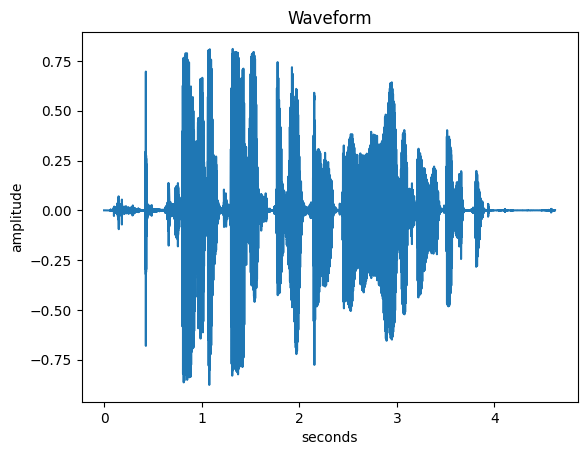

In [25]:
# Plot the signal on the y-axis and time on the x-axis
# The sample rate is the number of samples per second
# The timestamps are the x-axis values
# The amplitude is the y-axis values
plt.plot(create_timestamps(signal, sample_rate), signal)
plt.title("Waveform")
plt.xlabel("seconds")
plt.ylabel("amplitude")
plt.show()

Text(0, 0.5, 'amplitude')

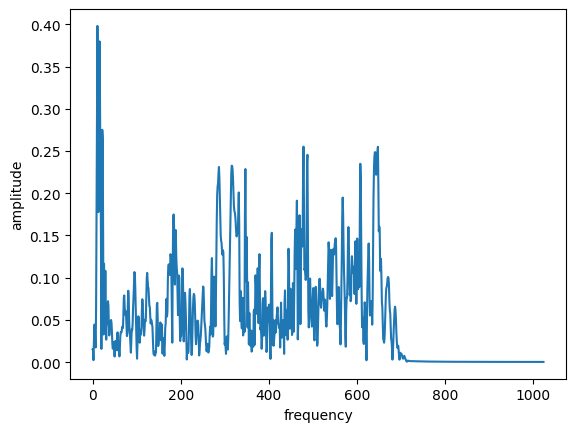

In [26]:
# Plot the spectrum of one window
# 2048 is the window size, 2049 is the hop size
spectrum = np.abs(librosa.stft(signal[10000:12048], n_fft=2048, hop_length=2049))
plt.plot(spectrum)
plt.xlabel("frequency")
plt.ylabel("amplitude")

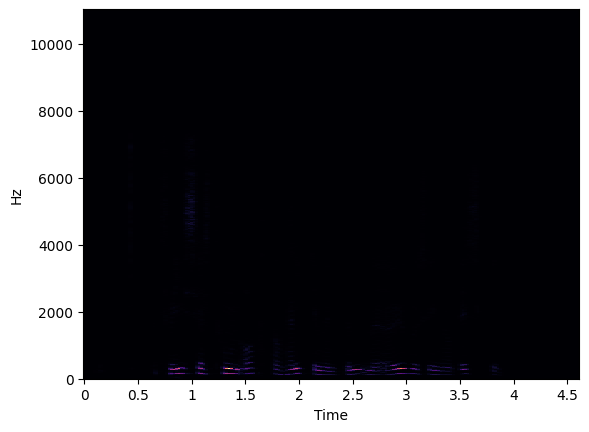

In [27]:
# Plot the spectrogram of the signal (all windows)
spectrogram = np.abs(librosa.stft(signal))
librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="hz")

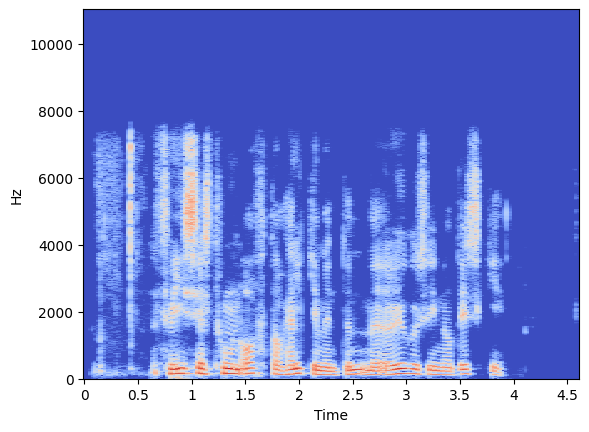

In [29]:
# Plot the spectrogram of the signal
# Convert the amplitude to decibels (humans don't hear loudness linearly)
spectrogram = librosa.stft(signal)
db_spectrogram = librosa.amplitude_to_db(np.abs(spectrogram))
librosa.display.specshow(db_spectrogram, sr=sample_rate, x_axis="time", y_axis="hz")

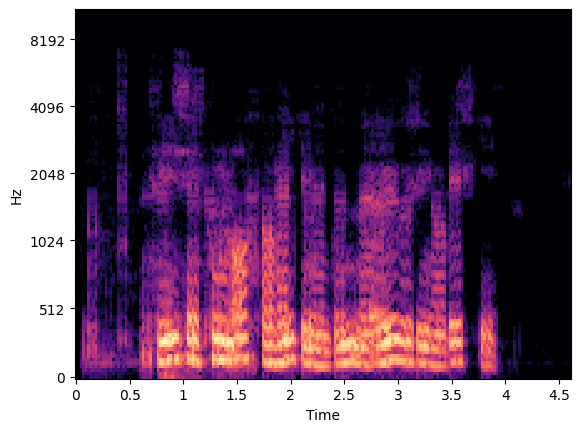

In [30]:
# Plot the mel spectrogram of the signal
# Convert the amplitude to decibels as before
# The mel-filters modify the y-axis since humans don't hear frequencies linearly (and nothing over 20kHz)
spectrogram = librosa.stft(signal)
mel_spectrogram = librosa.feature.melspectrogram(S=spectrogram)
db_mel_spectrogram = librosa.amplitude_to_db(np.abs(mel_spectrogram))
librosa.display.specshow(db_mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel')

## Extracting MFCCs step-by-step

In [2]:
###To-do by the student...

# cut into frames (based on window length and hop)
# Apply Hann window
# DFT (Discrete Fourier Transform) to get spectrogram
# Apply mel filters
# take the log to convert power to decibels
# DCT (Discrete Cosine Transform) to get MFCCs
# Keep the first 13

##Optional additional "Dynamic" features:
#Delta
#Delta delta

## Extracting MFCCs the easy way (librosa puts the steps together for you)

In [32]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sample_rate)
mfccs.shape

(13, 199)

## What information is in MFCCs?
### And why is it often enough to only use the first 13?

In [10]:
reconstructed_signals = {}
for i in (2, 7, 13, 25, 39):
    mfcc = librosa.feature.mfcc(y=signal, n_mfcc=i, sr=sample_rate)
    reconstructed_signals[i] = librosa.feature.inverse.mfcc_to_audio(mfcc, sr=sample_rate)


In [11]:
for n_mfcc in reconstructed_signals:
    print(n_mfcc, "MFCCs")
    ipd.display(ipd.Audio(reconstructed_signals[n_mfcc], rate=sample_rate))

2 MFCCs


7 MFCCs


13 MFCCs


25 MFCCs


39 MFCCs


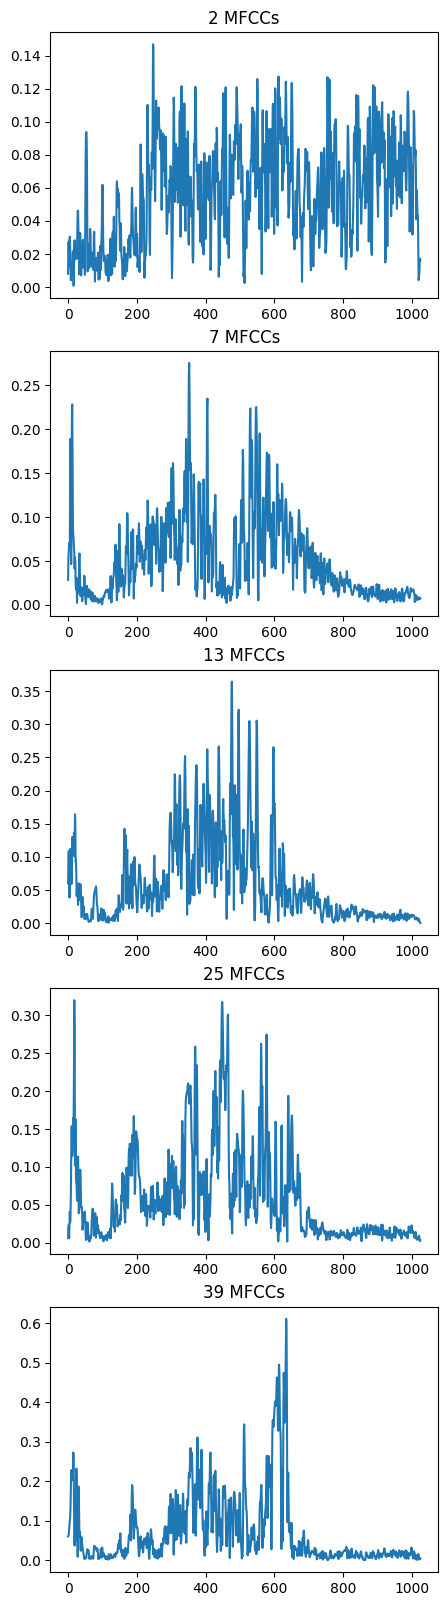

In [12]:
# for each signal, plot the spectrum of one window
fig, axs = plt.subplots(5,figsize=(5,20))
for i, n_mfcc in enumerate(reconstructed_signals):
    spectrum = np.abs(librosa.stft(reconstructed_signals[n_mfcc][10000:12048], n_fft=2048, hop_length=2049))
    axs[i].set_title(str(n_mfcc) + " MFCCs")
    axs[i].plot(spectrum)